In [1]:
%matplotlib inline

In [2]:
import astra
import numpy as np
import pylab as plt
import os
import glob
import scipy.ndimage
import skimage.segmentation
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)

In [3]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = unicode(index or '?')

In [4]:
def images_diff(im1, im2):
    assert(im1.shape==im2.shape)
    rec_diff = np.zeros(shape=(im1.shape[0],im1.shape[1],3), dtype='float32')
    im1_t = im1.copy()
    im1_t = (im1_t-im1_t.min())/(im1_t.max()-im1_t.min())
    
    im2_t = im2.copy()
    im2_t = (im2_t-im2_t.min())/(im2_t.max()-im2_t.min())
    
    # nrecon_rec_t[nrecon_rec_t<0] = 0
    diff_rec = im1_t-im2_t
    rec_diff[...,0] = diff_rec*(diff_rec>0)
    rec_diff[...,1] = -diff_rec*(diff_rec<0)
    rec_diff[...,2] = rec_diff[...,1]
    return rec_diff

In [67]:
def log_sinogram(sino):
    '''
    This function convert NRecon sinogram_raw to sinogram.
    Searchin cut threshold, calculate log and change range to 0 ... 65535. 
    
    Inputs:
      sino - 2D raw sinogram
    '''
    tmp_sino = sino.copy()  # make copy for inplace corrections
    tmp_sino[tmp_sino==0]=0.1
    k1 = tmp_sino[:,1:11].mean(axis=-1) # left range
    k2 = tmp_sino[:,-12:-2].mean(axis=-1) # right range
    trh = np.maximum(k1,k2)  # cut threshold
    for i in range(tmp_sino.shape[0]):  # нормируем каждую строку
        t=tmp_sino[i]  # указатель на строку
        t[t>trh[i]]=trh[i]  # обрезаем по верхнему порогу 
        t/=trh[i]  # нормируем строку перед логрифмированием
    
    tmp_sino = -np.log(tmp_sino)
    tmp_sino = tmp_sino/tmp_sino.max()*65535  # переходим в диапазон 0...65535
    return tmp_sino


In [68]:
# data_root = '/diskmnt/a/makov/yaivan/MMC_1/'
# nrecon_root_folder = os.path.join(data_root,'_tmp','nrecon')
# nrecon_folders = glob.glob(os.path.join(nrecon_root_folder, '*'))
# nrecon_folders = [nf for nf in nrecon_folders if os.path.isdir(nf)]
# print len(nrecon_folders)

In [69]:
# !ls /diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_0_rc_0

In [ ]:
# !ls /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_*_rc_0

In [ ]:
# !md5sum /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/*

In [ ]:
# bh_images = {}
# sr_images  = {}
# sl_images = {}
# for bh in log_progress(np.arange(0,101,10)):
#     nrecon_folder='/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_{}_rc_0/'.format(bh)
#     sino_raw = os.path.join(nrecon_folder, 'MMC1_2.82um__sinoraw_0960.tif')
#     sino_log = os.path.join(nrecon_folder, 'MMC1_2.82um__sino0960.tif')
#     rec_file = os.path.join(nrecon_folder, 'MMC1_2.82um__rec0960.png')
#     v_max = 0.52
#     v_min = -0.18
# #     nrecon_folder='/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_{}_rc_0/'.format(bh)
# #     sino_raw = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__sinoraw_0980.tif')
# #     sino_log = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__sino0980.tif')
# #     rec_file = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__rec0980.png')
# #     v_max = 0.0680
# #     v_min = -0.0250
#     if os.path.isfile(rec_file):
#         bh_images[bh] = np.squeeze(plt.imread(rec_file).astype('float32')[...,0])
#         sr_images[bh] = plt.imread(sino_raw).astype('float32')
#         sl_images[bh] = plt.imread(sino_log).astype('float32')

In [ ]:
# sr = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/noTS/Chieftain_Unc_2.8__sinoraw_0980.tif').astype('float32')
# sl = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/noTS/Chieftain_Unc_2.8__sino0980.tif').astype('float32')
# images = sorted(glob.glob(r'/diskmnt/a/makov/yaivan/Sand/Raw/Chieftain_Unc_2.8_????.tif'))

In [82]:
sr = plt.imread('/home/makov/Downloads/nrecon/Chieftain_Unc_2.8__sinoraw_0245.tif').astype('float32')
sl = plt.imread('/home/makov/Downloads/nrecon/Chieftain_Unc_2.8__sino0245.tif').astype('float32')

In [52]:
sr = plt.imread('/home/makov/Downloads/nrecon/MMC1_2.82um__sinoraw_0400.tif').astype('float32')
sl = plt.imread('/home/makov/Downloads/nrecon/MMC1_2.82um__sino0400.tif').astype('float32')

In [86]:
sr = plt.imread('/home/makov/Downloads/nr/2/Chieftain_Unc_2.8__sinoraw_0491.tif').astype('float32')
sl = plt.imread('/home/makov/Downloads/nr/2/Chieftain_Unc_2.8__sino0491.tif').astype('float32')

In [87]:
sl_my = log_sinogram(sr)

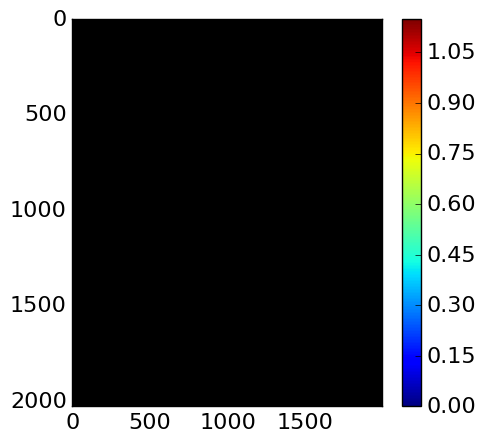

In [90]:
plt.figure(figsize=(5,5))
plt.imshow(100*images_diff(sl_my,sl))
plt.axis('tight')
plt.colorbar()

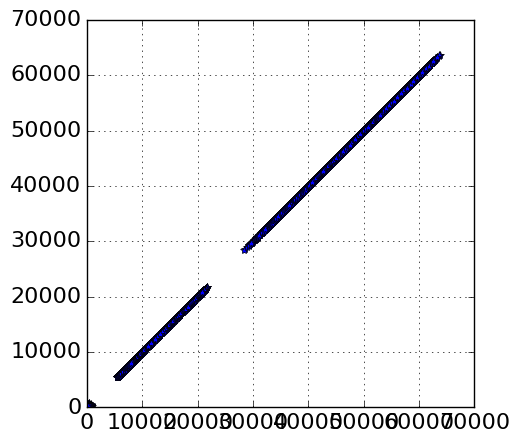

In [85]:
plt.figure(figsize=(5,5))
plt.plot(sl_my.ravel()[::100],sl.ravel()[::100],'*')
plt.grid()

(8116,)

In [48]:
sr = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/TS/Chieftain_Unc_2.8__sinoraw_0980.tif').astype('float32')
sl = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/TS/Chieftain_Unc_2.8__sino0980.tif').astype('float32')
# images = sorted(glob.glob(r'/diskmnt/a/makov/yaivan/Sand/Raw/Chieftain_Unc_2.8_????.tif'))

In [51]:
sr = plt.imread('/home/makov/Downloads/NRecon_out/test/Chieftain_Unc_2.8__sinoraw_0245.tif').astype('float32')
sl = plt.imread('/home/makov/Downloads/NRecon_out/test/Chieftain_Unc_2.8__sino0245.tif').astype('float32')

IOError: [Errno 2] No such file or directory: '/home/makov/Downloads/NRecon_out/test/Chieftain_Unc_2.8__sinoraw_0245.tif'

In [ ]:
sr_files = glob.glob('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/TS/Chieftain_Unc_2.8__sinoraw_????.tif')
sr_files = sorted(sr_files)

sl_files = glob.glob('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/TS/Chieftain_Unc_2.8__sino????.tif')
sl_files = sorted(sl_files)

In [ ]:
sr_files

In [ ]:
sl_files

In [ ]:
sr_shape = sr.shape
sl_shape = sl.shape
print(sr_shape, sl_shape)

In [ ]:
sr = np.zeros((len(sr_files), sr_shape[0], sr_shape[1]))
for isrf, srf in enumerate(sr_files):
    sr[isrf]=plt.imread(srf).astype('float32')
    
sl = np.zeros((len(sl_files), sl_shape[0], sl_shape[1]))
for islf, slf in enumerate(sl_files):
    sl[islf]=plt.imread(slf).astype('float32')

In [ ]:
from numpy import median

In [ ]:
for sn in [10,]: #range(sr.shape[0]):
    plt.figure(figsize=(10,10))
    r=sr[sn].copy()
    r[sl[sn]>0]=65535
#     plt.plot(sr[sn,:,1:11].mean(axis=-1), label='mean')
#     plt.plot(sr[sn,:,-11:-1].mean(axis=-1), label='mean')
    plt.plot(np.maximum(sr[sn,:,1:11].mean(axis=-1), sr[sn,:,-12:-2].mean(axis=-1)), label='mean')
    plt.plot(r.min(axis=-1), label='cut at {}'.format(sn))
    plt.grid()
    plt.legend(loc=0)
    plt.show()

In [ ]:
for sn in range(sr.shape[0]):
    plt.figure(figsize=(10,10))
#     plt.subplot(121)
    r=sr[sn].copy()
    r[sl[sn]>0]=65535
#     plt.plot(median(sr[sn,:,:11],axis=-1), r.min(axis=-1),'o')
    k0 = r.min(axis=-1)
    k1 = sr[sn,:,1:11].mean(axis=-1)
    k2 = sr[sn,:,-12:-2].mean(axis=-1)
    plt.plot(k1, k0,'o')
    plt.plot(k2, k0,'o')
    plt.plot(np.maximum(k1,k2), k0,'o')
    plt.grid()
#     plt.subplot(122)
#     plt.imshow(sl[sn],cmap=plt.cm.gray)
    plt.show()

In [ ]:
for sn in range(sr.shape[0]):
    plt.figure(figsize=(10,10))
    r=sr[sn].copy()
    r[sl[sn]>0]=65535
    k0 = r.min(axis=-1)
    k1 = sr[sn,:,1:11].mean(axis=-1)
    k2 = sr[sn,:,-12:-2].mean(axis=-1)
    k3 = np.maximum(k1,k2)
#     k3 = np.hstack([sr[sn,:,1:11], sr[sn,:,-12:-2]])
#     k3= np.mean(k3, axis=-1)
    plt.plot(k1, k0,'o')
    plt.plot(k2, k0,'o')
#     plt.plot(k3, k0,'o')
    plt.plot(k3, k0,'o')
    plt.grid()
    plt.title(sn)
    plt.show()

In [ ]:
k3 = np.hstack([sr[sn,:,1:11], sr[sn,:,-12:-2]])

In [ ]:
k3.shape

In [ ]:
plt.figure(figsize=(10,10))
for sn in range(sr.shape[0]):
    r=sr[sn].copy()
    r[sl[sn]>0]=65535
    plt.plot(sr[sn,:,:11].mean(axis=-1), label='mean')
    plt.plot(r.min(axis=-1), label='cut at {}'.format(sn))
plt.grid()
# plt.legend(loc=0)
plt.show()

In [ ]:
from cv2 import medianBlur

In [ ]:
font = {'size'   : 14}
matplotlib.rc('font', **font)
for sn in range(sr.shape[0]):
    plt.figure(figsize=(15,15))
    
    y=log_sinogram(sr[sn])
    x = sl[sn]
    
#     plt.subplot(221)
#     plt.imshow(x,cmap=plt.cm.gray)
#     plt.colorbar(orientation='horizontal')
#     plt.title('Original LOG')
    
#     plt.subplot(222)
#     plt.imshow(sr[sn], cmap=plt.cm.gray)
#     plt.colorbar(orientation='horizontal')
#     plt.title('Original RAW')
    
#     plt.subplot(223)
#     plt.imshow(y,cmap=plt.cm.gray)
#     plt.title('My LOG')
#     plt.colorbar(orientation='horizontal')
    
#     plt.subplot(224)
    d = y-x
    plt.imshow(d,cmap=plt.cm.gray)
    plt.title('My-Orginal LOG min: {:03f}, max: {:03f}, pixels {}'.format(
                d.min(), d.max(),
                np.count_nonzero(np.abs(d>=10)))
             )
    plt.colorbar(orientation='horizontal')
    
    plt.show()
    

In [ ]:
for sn in range(sr.shape[0]):
    plt.figure(figsize=(7,7))
    y = sr[sn].copy()
    x = sl[sn].copy()
    y = -np.log(y)
    y = y/y.max()*65535
    plt.plot(x.ravel()[::1000],y.ravel()[::1000],'o',label='original')
    
    y=sr[sn].copy()
    trh = y[:,:11].mean(axis=-1)
    for i in range(y.shape[0]):
        t=y[i]
        t[t>trh[i]]=trh[i]
        t/=trh[i]
    y = -np.log(y)
    y = y/y.max()*65535
    plt.plot(x.ravel()[::1000],y.ravel()[::1000],'o',label='fixed')
    plt.title(sn)
    plt.grid()
    plt.legend(loc=0)
    plt.show()

In [ ]:
for im_numb in [0,]:
    x = sl[im_numb,100::100,:]
    y =sr.copy()[im_numb, 100::100,:]
    trh = y[:,:11].mean(axis=-1)
    for i in range(y.shape[0]):
        t=y[i]
        t[t>trh[i]]=trh[i]
        t/=trh[i]
    y = -np.log(y)
    # y = (y.T-y.min(axis=-1)).T
    plt.figure(figsize=(10,10))
    plt.plot(x, y, 'o')
    # plt.plot(x,y)
    plt.grid(True)

    plt.show()

In [ ]:
sr=sr_images[0]
sl=sl_images[0]

In [ ]:
mx = []
mn = []
me = []
for im in log_progress(images[::10]):
    i =  plt.imread(im).astype('float32')
    mx.append(np.max(i))
    mn.append(np.min(i))
    me.append(np.mean(i))

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(sr, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mx, label = 'max')
# plt.plot(mn, label = 'min')
# plt.plot(me, label = 'mean')
plt.grid()
# plt.legend(loc=0)

In [ ]:
srf = sr_images[0]

In [ ]:
slf = sl_images[0]

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(sr-srf, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(sl-slf, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(sr, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
print(sr.min(), sr.max() )

In [ ]:
print(np.log(sr.min()), np.log(sr.max()))

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(sl, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
print(sl.min(), sl.max() )

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(-np.log(sr/65535)-(sl/65535), cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [ ]:
r=-np.log(sr/65535)
l=sl/65535
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(r,l))
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(1000*images_diff(sl,log_sinogram(sr)))
plt.colorbar(orientation='horizontal')

In [ ]:
r=-np.log(sr/65535)
rr = (r-r.min(axis=-1).max())
rr[rr<0]=0

l=sl/65535
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(rr,l))
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=0))
plt.plot(sr.min(axis=0))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
for s in np.linspace(0, sr.shape[1], 3, endpoint=False):
    plt.plot(sr[0,int(s)])
plt.grid(True)
plt.show()

In [ ]:
sr.shape

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=-1))
plt.plot(sr.min(axis=-1))
plt.plot(sr.mean(axis=-1))
plt.grid(True)

In [ ]:
2**16*0.9

In [ ]:
x = sl[100::100]
y=sr.copy()[100::100]
trh = y[:,:10].mean(axis=-1)
for i in range(y.shape[0]):
    t=y[i]
    t[t>trh[i]]=trh[i]
    t/=trh[i]
y = -np.log(y)
# y = (y.T-y.min(axis=-1)).T
plt.figure(figsize=(10,10))
plt.plot(x, y)
# plt.plot(x,y)
plt.grid(True)

In [ ]:
x = sl.copy()
y=sr.copy()
trh = y[:,:11].mean(axis=-1)
for i in range(y.shape[0]):
    t=y[i]
    t[t>trh[i]]=trh[i]
    t/=trh[i]
y = -np.log(y)

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(1000*images_diff(x,y))
plt.colorbar(orientation='horizontal')

In [ ]:
plt.figure(figsize=(10,12))
plt.imshow(x-y/y.max()*65535)
plt.colorbar(orientation='horizontal')

In [ ]:
np.max(x-y/y.max()*65535)

In [ ]:
trh[np.newaxis,:].shape

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
p = curve_fit(lambda x,a,b: a*x+b, x.ravel(), y.ravel())
print p

In [ ]:
-p[0][1]/p[0][0]

In [ ]:
sr.max()

In [ ]:
sr.max(axis=-1).mean()

In [ ]:
r=sr.copy()
r[sl>0]=65535
plt.figure(figsize=(10,10))
plt.plot(sr[:,:1].mean(axis=-1),r.min(axis=-1),'o')
    

In [ ]:
r=sr.copy()
r[sl>0]=65535
plt.figure(figsize=(10,10))
for ss in range(8,13):
    # plt.plot(r.min(axis=-1))
    # plt.plot(sr.max(axis=-1))
    plt.plot(sr[:,:ss].mean(axis=-1),r.min(axis=-1), 'o', label=ss)
    
plt.grid()
plt.legend(loc=0)
    # plt.plot(x,y)
    # plt.colorbar()

In [ ]:
r=-np.log(sr)
rr = ((r.T-r.min(axis=-1))/r.mean(axis=-1)).T*r.mean()
rr[rr<0]=0

l=sl/60000
plt.figure(figsize=(10,12))
# plt.imshow(100*images_diff(rr,l))
plt.imshow(rr/(1.2*l),cmap=plt.cm.gray,vmin=0.9, vmax=1.1)
plt.colorbar(orientation='horizontal')

In [ ]:
x = sl
y = -np.log(sr)
plt.figure(figsize=(10,10))
plt.plot(x[100], y[100],'x')
plt.grid(True)

In [ ]:
np.log(55000)

In [ ]:
np.exp(0.05)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sl.min(axis=-1))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sl.max(axis=-1))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sl.mean(axis=-1))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr.min(axis=-1))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=-1))
plt.grid(True)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr.mean(axis=-1))
plt.grid(True)

In [ ]:
np.exp(10.9)

In [ ]:
np.min(sl)

In [ ]:
from skimage.filter import gaussian

In [ ]:
# %load /diskmnt/a/makov/yaivan/Sand/Raw/Chieftain_Unc_2.8_.log
[System]
Scanner=Skyscan1172
Instrument S/N=08G01121
Hardware version=A
Software=Version 1. 5 (build 23)
Home directory=C:\SkyScan
Source Type=Hamamatsu 100/250
Camera=Hamamatsu 10Mp camera
Camera Pixel Size (um)=   11.40
CameraXYRatio=1.0010
Incl.in lifting (um/mm)=-0.4750
[User]
User Name=IYakimchuk
Computer Name=SLB-6BBX74J
[Acquisition]
Data directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Filename Prefix=Chieftain_Unc_2.8_
Configuration=C:\Skyscan1172A_10MP_Hamamatsu\std
Number of Files= 2031
Source Voltage (kV)= 100
Source Current (uA)= 100
Number of Rows= 2096
Number of Columns= 4000
Image crop origin X=   0
Image crop origin Y=0
Camera binning=1x1
Image Rotation=0.5200
Gantry direction=CC
Image Pixel Size (um)=    2.83
Object to Source (mm)=56.000
Camera to Source (mm)=225.315
Vertical Object Position (mm)=37.797
Optical Axis (line)= 980
Filter=Al 0.5 mm
Image Format=TIFF
Depth (bits)=16
Screen LUT=0
Exposure (ms)=  1767
Rotation Step (deg)=0.100
Frame Averaging=ON (9)
Random Movement=OFF (10)
Use 360 Rotation=NO
Geometrical Correction=ON
Camera Offset=OFF
Median Filtering=ON
Flat Field Correction=ON
Rotation Direction=CC
Scanning Trajectory=ROUND
Type Of Motion=STEP AND SHOOT
Study Date and Time=Jan 23, 2016  05:45:50
Scan duration=10:06:00
[Reconstruction]
Reconstruction Program=NRecon
Program Version=Version: 1.6.5.8
Program Home Directory=C:\SkyScan\NRecon_GPU
Reconstruction engine=NReconServer
Engine version=Version: 1.6.5
Reconstruction from batch=No
Reconstruction servers= slb-8hlv74j 
Option for additional F4F float format=OFF
Dataset Origin=Skyscan1172
Dataset Prefix=Chieftain_Unc_2.8_
Dataset Directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Output Directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Reconstructed
Time and Date=Jan 26, 2016  16:58:16
First Section=98
Last Section=1982
Reconstruction duration per slice (seconds)=5.300265
Total reconstruction time (1885 slices) in seconds=9991.000000
Postalignment=-6.00
Section to Section Step=1
Sections Count=1885
Result File Type=PNG
Result File Header Length (bytes)=Unknown: compressed JPG format (100%)
Result Image Width (pixels)=4000
Result Image Height (pixels)=4000
Pixel Size (um)=2.83356
Reconstruction Angular Range (deg)=203.00
Use 180+=OFF
Angular Step (deg)=0.1000
Smoothing=0
Ring Artifact Correction=20
Draw Scales=OFF
Object Bigger than FOV=OFF
Reconstruction from ROI=OFF
Filter cutoff relative to Nyquisit frequency=100
Filter type=0
Filter type meaning(1)=0: Hamming (Ramp in case of optical scanner); 1: Hann; 2: Ramp; 3: Almost Ramp; 
Filter type meaning(2)=11: Cosine; 12: Shepp-Logan; [100,200]: Generalized Hamming, alpha=(iFilter-100)/100
Undersampling factor=1
Threshold for defect pixel mask (%)=0
Beam Hardening Correction (%)=60
CS Static Rotation (deg)=0.0
Minimum for CS to Image Conversion=-0.0250
Maximum for CS to Image Conversion=0.0680
HU Calibration=OFF
BMP LUT=0
Cone-beam Angle Horiz.(deg)=11.557156
Cone-beam Angle Vert.(deg)=6.070880


In [ ]:
# %load /diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_0_rc_0/tomo_config.log
[System]
Scanner = Skyscan1172
Instrument S/N = 08G01121
Hardware version = A
Software = Version 1. 5 (build 23)
Home directory = C:\SkyScan
Source Type = Hamamatsu 100/250
Camera = Hamamatsu 10Mp camera
Camera Pixel Size (um) = 11.40
CameraXYRatio = 1.0010
Incl.in lifting (um/mm) = -0.4750

[User]
User Name = IYakimchuk
Computer Name = SLB-6BBX74J

[Acquisition]
Data directory = E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Filename Prefix = Chieftain_Unc_2.8_
Configuration = C:\Skyscan1172A_10MP_Hamamatsu\std
Number of Files = 2031
Source Voltage (kV) = 100
Source Current (uA) = 100
Number of Rows = 2096
Number of Columns = 4000
Image crop origin X = 0
Image crop origin Y = 0
Camera binning = 1x1
Image Rotation = 0.5200
Gantry direction = CC
Image Pixel Size (um) = 2.83
Object to Source (mm) = 56.000
Camera to Source (mm) = 225.315
Vertical Object Position (mm) = 37.797
Optical Axis (line) = 980
Filter = Al 0.5 mm
Image Format = TIFF
Depth (bits) = 16
Screen LUT = 0
Exposure (ms) = 1767
Rotation Step (deg) = 0.100
Frame Averaging = ON (9)
Random Movement = OFF (10)
Use 360 Rotation = NO
Geometrical Correction = ON
Camera Offset = OFF
Median Filtering = ON
Flat Field Correction = ON
Rotation Direction = CC
Scanning Trajectory = ROUND
Type Of Motion = STEP AND SHOOT
Study Date and Time = Jan 23, 2016  05:45:50
Scan duration = 10:06:00

[Reconstruction]
Reconstruction Program = NRecon
Program Version = Version: 1.6.5.8
Program Home Directory = C:\SkyScan\NRecon_GPU
Reconstruction engine = NReconServer
Engine version = Version: 1.6.5
Reconstruction from batch = No
Reconstruction servers = slb-8hlv74j
Option for additional F4F float format = OFF
Dataset Origin = Skyscan1172
Dataset Prefix = Chieftain_Unc_2.8_
Dataset Directory = f:\big\yaivan\Sand\Raw
Output Directory = C:\Users\makov\Desktop\NRecon_out\Chieftain_Unc_2.8_\bh_0_rc_0
Time and Date = Jan 26, 2016  16:58:16
First Section = 980
Last Section = 980
Reconstruction duration per slice (seconds) = 5.300265
Total reconstruction time (1885 slices) in seconds = 9991.000000
Postalignment = -6.00
Section to Section Step = 1
Sections Count = 1885
Result File Type = PNG
Result File Header Length (bytes) = Unknown: compressed JPG format (100%)
Result Image Width (pixels) = 4000
Result Image Height (pixels) = 4000
Pixel Size (um) = 2.83356
Reconstruction Angular Range (deg) = 203.00
Use 180+ = OFF
Angular Step (deg) = 0.1000
Smoothing = 0
Ring Artifact Correction = 0
Draw Scales = OFF
Object Bigger than FOV = OFF
Reconstruction from ROI = OFF
Filter cutoff relative to Nyquisit frequency = 100
Filter type = 0
Filter type meaning(1) = 0: Hamming (Ramp in case of optical scanner); 1: Hann; 2: Ramp; 3: Almost Ramp;
Filter type meaning(2) = 11: Cosine; 12: Shepp-Logan; [100,200]: Generalized Hamming, alpha=(iFilter-100)/100
Undersampling factor = 1
Threshold for defect pixel mask (%) = 0
Beam Hardening Correction (%) = 0
CS Static Rotation (deg) = 0.0
Minimum for CS to Image Conversion = -0.0250
Maximum for CS to Image Conversion = 0.0680
HU Calibration = OFF
BMP LUT = 0
Cone-beam Angle Horiz.(deg) = 11.557156
Cone-beam Angle Vert.(deg) = 6.070880



In [ ]:
sl_my = log_sinogram(sr)

In [ ]:
sl_my[np.isnan(sl_my)]=65535
plt.figure(figsize=(10,10))
plt.plot(sl.ravel(), sl_my.ravel(),'o')
plt.grid()
plt.show()

In [ ]:
sl_my.ravel().min()

In [ ]:
plt.hist(sr.ravel(), bins=100);

In [ ]:
plt.hist(sl.ravel(), bins=100);

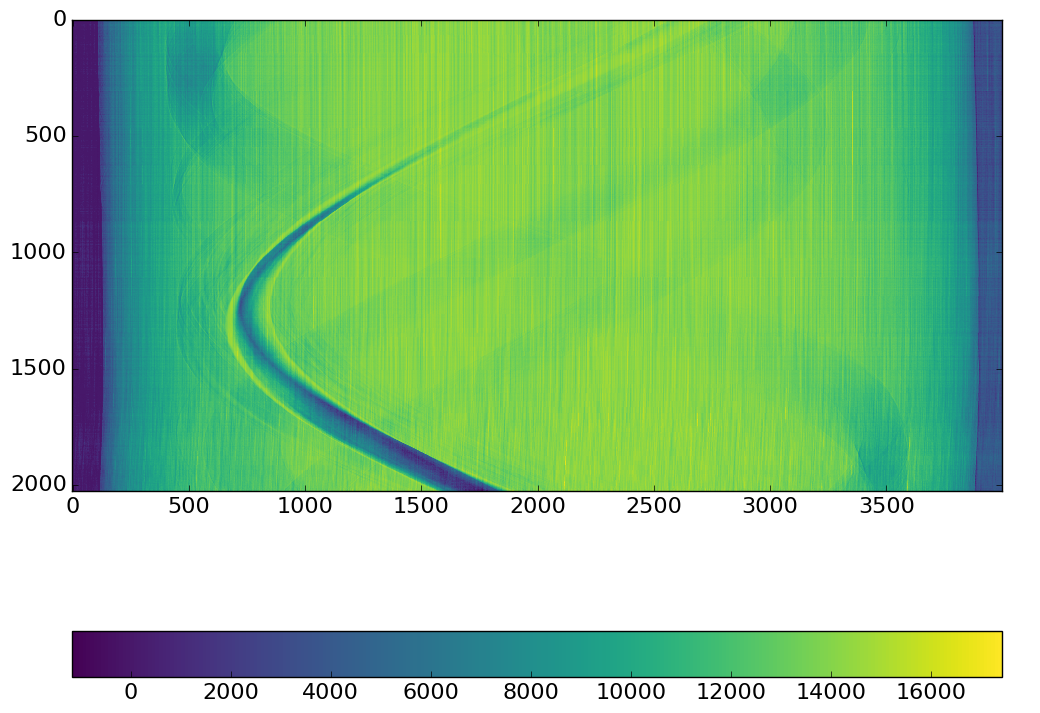

In [58]:
plt.figure(figsize=(12,12))
plt.imshow(sl_my-sl, cmap=plt.cm.viridis)
plt.colorbar(orientation='horizontal')

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def fitf(x,a,b,c):
    return(-c*np.log(b*x-a))

p=curve_fit(fitf, np.arange(len(d)),d, [1,-2,-1])

In [ ]:
p[0]

In [ ]:
d=sl[1000, 100:200]/65535
dx = np.arange(len(d))
plt.figure(figsize=(12,12))
plt.plot(d,'o')
dy = fitf(dx,p[0][0],p[0][1],p[0][2])
plt.plot(dx, dy)
plt.grid()

In [ ]:
dx.shape

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(sr[1000])
plt.grid()

In [ ]:
d[1]/d[0]

In [ ]:
tiffs = glob.glob('/diskmnt/a/makov/yaivan/MMC_1/Raw/*.iif')
tiffs = sorted(tiffs)
print(len(tiffs))

In [ ]:
from PIL import Image

In [ ]:
tt=[]
for t in log_progress(tiffs):
    with Image.open(t,'r') as im:
        tags=im.tag
        tt.append(tags)

In [ ]:
from pprint import pprint
for k, v in tags.items():
    print k,':',v

In [ ]:
r = [x[61448][0] for x in tt] 
plt.figure(figsize=(15,10))
plt.plot(r[:-1],'*')
plt.grid()